In [1]:
from movement.io import load_poses

In [3]:
ds_less_reliable = load_poses.from_sleap_file(
    "/home/parikshit/Desktop/curr_work/extra_files/SLEAP_three-mice_Aeon_mixed-labels.analysis.h5"
)
ds_more_reliable = load_poses.from_sleap_file(
    "/home/parikshit/Desktop/curr_work/extra_files/SLEAP_three-mice_Aeon_proofread.analysis.h5"
)

In [6]:
position = ds_less_reliable.position

In [ ]:
da_less_reliable = position.sel(individuals="AEON3B_TP1", keypoints="centroid")

In [ ]:
da_less_reliable.plot.line(x="time", row="space", aspect=2, size=2.5)

In [ ]:
position_reliable = ds_more_reliable.position
da_reliable = position_reliable.sel(
    individuals="AEON3B_TP1", keypoints="centroid"
)
da_reliable.plot.line(x="time", row="space", aspect=2, size=2.5)

### Plot Trajectory

In [ ]:
from movement.plots.trajectory import plot_centroid_trajectory

mouse_name = "AEON3B_TP1"
fig, ax = plot_centroid_trajectory(position, individual=mouse_name)
fig.show()

In [ ]:
mouse_name = "AEON3B_TP1"
fig, ax = plot_centroid_trajectory(position_reliable, individual=mouse_name)
fig.show()

### Individual results

In [ ]:
x_coordinates = da_less_reliable.sel(space="x").values
y_coordinates = da_less_reliable.sel(space="y").values

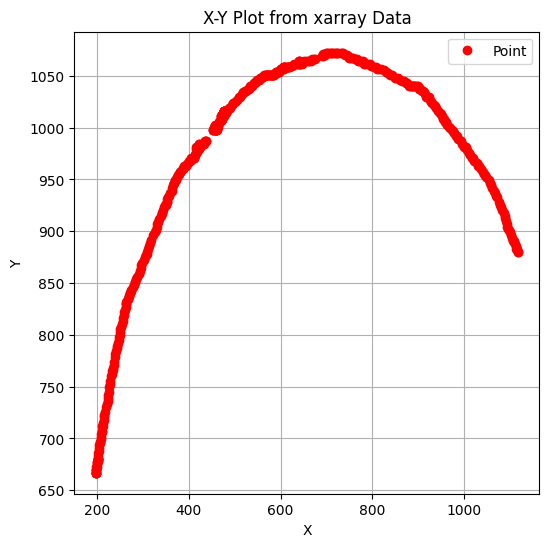

In [67]:
import matplotlib.pyplot as plt

# Assuming the data is stored in a list called 'data'
x = x_coordinates
y = y_coordinates

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(x, y, "ro", label="Point")  # 'ro' = red circle marker
plt.title("X-Y Plot from xarray Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

In [68]:
x_coordinates = da_reliable.sel(space="x").values
y_coordinates = da_reliable.sel(space="y").values

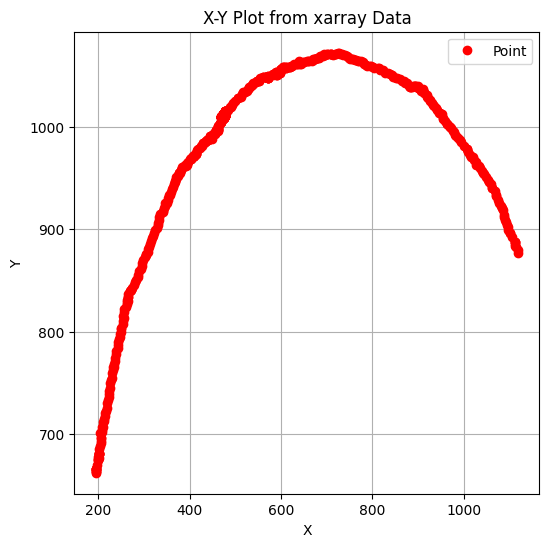

In [69]:
import matplotlib.pyplot as plt

# Assuming the data is stored in a list called 'data'
x = x_coordinates
y = y_coordinates

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(x, y, "ro", label="Point")  # 'ro' = red circle marker
plt.title("X-Y Plot from xarray Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
less_reliable = list(
    zip(
        da_less_reliable.sel(space="x").values,
        da_less_reliable.sel(space="y").values,
        strict=False,
    )
)
more_reliable = list(
    zip(
        da_reliable.sel(space="x").values,
        da_reliable.sel(space="y").values,
        strict=False,
    )
)

In [ ]:
import math

contains_nan = any(math.isnan(x) or math.isnan(y) for x, y in more_reliable)
print("Contains NaN:", contains_nan)

### Weighted Average

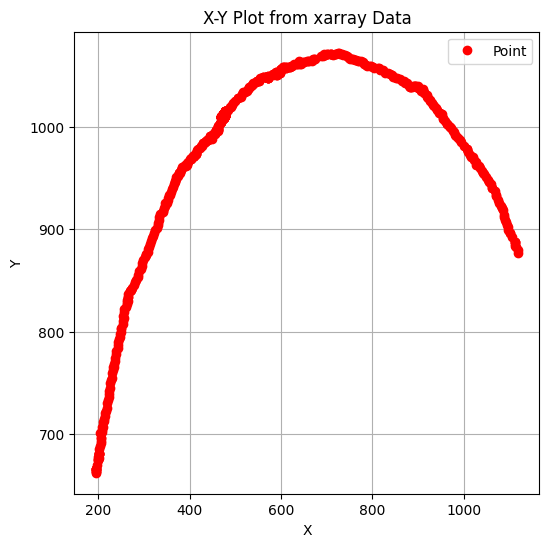

In [104]:
# Take weighted average of the two lists


def weighted_average(less_reliable, more_reliable, weight):
    x_combined, y_combined = [], []
    for (x1, y1), (x2, y2) in zip(less_reliable, more_reliable, strict=False):
        nan_value = math.isnan(x1) or math.isnan(y1)
        if nan_value:
            # combined.append((x2, y2))
            continue
        x = x1 * weight + x2 * (1 - weight)
        y = y1 * weight + y2 * (1 - weight)
        x_combined.append(x)
        y_combined.append(y)
    return x_combined, y_combined


x, y = weighted_average(less_reliable, more_reliable, 0)


# Plotting
plt.figure(figsize=(6, 6))
plt.plot(x, y, "ro", label="Point")  # 'ro' = red circle marker
plt.title("X-Y Plot from xarray Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

### Rolling Filter

In [111]:
from movement.filtering import median_filter

In [ ]:
# Fill the lists with NaN values
traj_combined = da_reliable.combine_first(da_less_reliable)

window = 5
# take the rolling avg
traj_combined = median_filter(traj_combined, window, print_report=True)


Missing points (marked as NaN) in input
	Individual: AEON3B_TP1
		None: 0/601 (0.0%)

Missing points (marked as NaN) in output
	Individual: AEON3B_TP1
		None: 0/601 (0.0%)


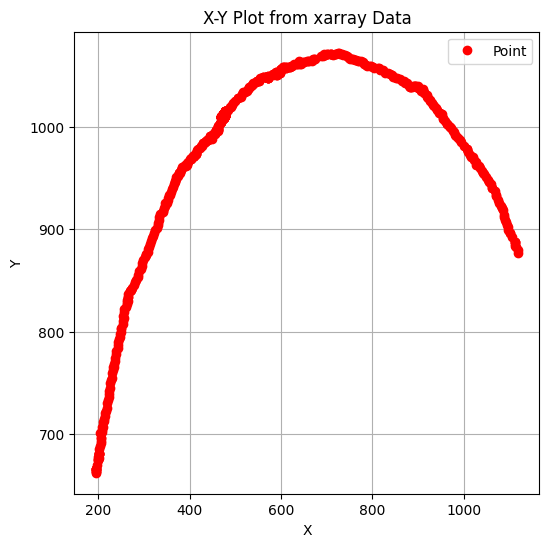

In [113]:
x_coordinates = traj_combined.sel(space="x").values
y_coordinates = traj_combined.sel(space="y").values

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(x, y, "ro", label="Point")  # 'ro' = red circle marker
plt.title("X-Y Plot from xarray Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()